<a href="https://colab.research.google.com/github/janastadtruckerova/Introduction-to-Python-projects/blob/main/Global_AI_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analýza globálneho indexu AI v 62 krajinách pomocou Pandas

**Úvod:**

V tomto projekte som analyzovala globálny index AI (umelá inteligencia) 62 krajín s cieľom identifikovať krajiny s vysokou a nízkou úrovňou implementácie a rozvoja AI. Dáta som získala z Kaggle - https://www.kaggle.com/datasets/katerynameleshenko/ai-index, pričom som sa sústredila na to, aby som preukázala zručnosti s knižnicou Pandas pre čistenie a analýzu dát.

**Ciele projektu:**

- Získať prehľad o úrovni rozvoja AI v rôznych krajinách a regiónoch.
- Zistiť, ktoré krajiny a regióny dosahujú najvyššie skóre v AI indexe.
- Identifikovať faktory, ktoré môžu súvisieť s výkonnosťou krajín v oblasti AI











**Kroky analýzy**:

 **Importovanie knižníc a načítanie údajov.**
V tomto kroku som importovala potrebné knižnice Pandas a Matplotlib. Ďalej som načítala dáta uložené v csv súbore.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("AI_index_db.csv")


**Preskúmanie údajov:**
V prvom kroku som skontrolovala ako vyzerajú údaje pomocou funkcií head(), info(), describe()

In [ ]:
df.head()  # Zobrazí prvých 5 riadkov
df.info()  # Informácie o dátových typoch, chýbajúcich hodnotách atď.
df.describe()  # Základné štatistiky numerických stĺpcov

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                62 non-null     object 
 1   Talent                 62 non-null     float64
 2   Infrastructure         62 non-null     float64
 3   Operating Environment  62 non-null     float64
 4   Research               62 non-null     float64
 5   Development            62 non-null     float64
 6   Government Strategy    62 non-null     float64
 7   Commercial             62 non-null     float64
 8   Total score            62 non-null     float64
 9   Region                 62 non-null     object 
 10  Cluster                62 non-null     object 
 11  Income group           62 non-null     object 
 12  Political regime       62 non-null     object 
dtypes: float64(8), object(5)
memory usage: 6.4+ KB


,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,16.803065,63.503710,66.925484,16.610000,14.824677,57.865645,6.171935,23.914677
std,15.214963,20.217525,20.000424,17.413996,19.419279,26.252448,14.029632,15.123586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.365000,55.857500,58.107500,3.032500,1.202500,41.030000,0.697500,14.805000
50%,13.445000,65.230000,69.505000,12.930000,9.005000,63.930000,2.585000,23.220000
75%,24.567500,75.947500,80.500000,25.412500,19.980000,77.952500,5.307500,30.487500
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Príprava údajov
Zmenila som dáto **tučný text**ve typy pre stĺpce Country a Region. Pôvodný dátový typ "object" som zmenila na dátový typ "Category". Prmenovvala som stĺpec Total scores na AI Index

In [ ]:
df["Region"] = df["Region"].astype("category")
df["Country"] = df["Country"].astype("category")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Country                62 non-null     category
 1   Talent                 62 non-null     float64 
 2   Infrastructure         62 non-null     float64 
 3   Operating Environment  62 non-null     float64 
 4   Research               62 non-null     float64 
 5   Development            62 non-null     float64 
 6   Government Strategy    62 non-null     float64 
 7   Commercial             62 non-null     float64 
 8   Total score            62 non-null     float64 
 9   Region                 62 non-null     category
 10  Cluster                62 non-null     object  
 11  Income group           62 non-null     object  
 12  Political regime       62 non-null     object  
dtypes: category(2), float64(8), object(3)
memory usage: 8.3+ KB


In [ ]:
df = df.rename(columns={"Total score": "AI Index"})

**Exploratívna analýza EDA - AI Index**
Analyzovala som základné štatistiky údajov (priemer, medián, minimum, maximum).
Vytvorila som vizualizácie na zobrazenie distribúcie AI indexu a porovnanie krajín (Top 10) a regiónov s vysokým a nízkym skóre.

**Vizualizácie**
Distribúcia AI indexu

In [ ]:
df.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,AI Index,Region,Cluster,Income group,Political regime
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy


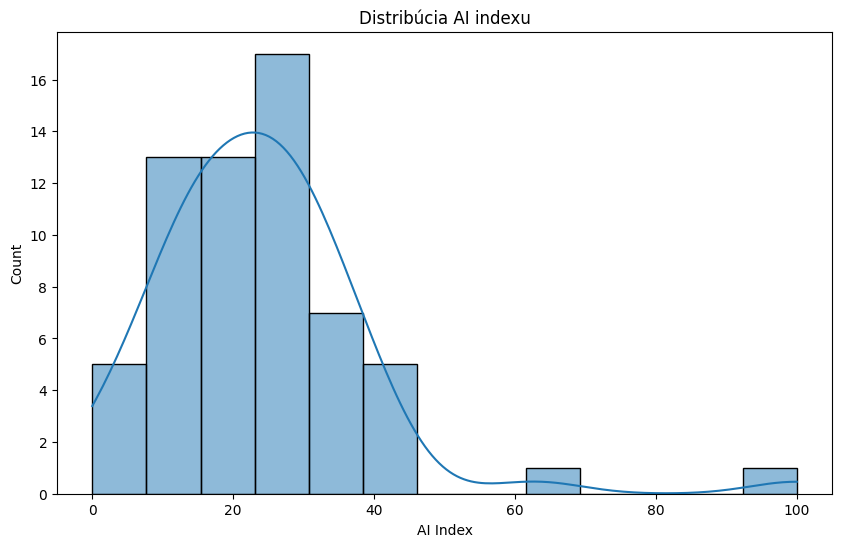

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df["AI Index"], kde=True)
plt.title("Distribúcia AI indexu")
plt.show()

**Analýza AI indexu v jednotlivých krajinách**

Zoradenie krajín podľa Ai indexu. Zistenie krajín, ktoré vedú a ktoré zaostávanjú. Top 10 krajín.

In [ ]:
# Zoradenie krajín podľa AI indexu zostupne
df_sorted = df.sort_values("AI Index", ascending=False)
df_sorted.head(10)  # Top 10 krajín

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,AI Index,Region,Cluster,Income group,Political regime
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy
5,Singapore,39.38,84.30,43.15,37.67,22.55,79.82,15.07,38.67,Asia-Pacific,Rising stars,High,Electoral democracy
6,South Korea,14.54,85.23,68.86,26.66,77.25,87.50,5.41,38.60,Asia-Pacific,Rising stars,High,Liberal democracy
7,The Netherlands,33.83,81.99,88.05,25.54,30.17,62.35,4.97,36.35,Europe,Rising stars,High,Liberal democracy
8,Germany,27.63,77.22,70.22,35.84,24.79,84.65,8.29,36.04,Europe,Traditional champions,High,Liberal democracy
9,France,28.32,77.15,80.02,25.48,21.44,91.20,7.65,34.42,Europe,Traditional champions,High,Liberal democracy


**Analýza AI indexu v jednotlivých krajinách**

In [ ]:
# Priemerný, minimálny a maximálny AI index
df["AI Index"].describe()

,AI Index
count,62.000000
mean,23.914677
std,15.123586
min,0.000000
25%,14.805000
50%,23.220000
75%,30.487500
max,100.000000


Krajiny s najvyšším a najnižším AI indexom

In [ ]:
# Krajina s najvyšším AI indexom
df.loc[df["AI Index"].idxmax()]



,0
Country,United States of America
Talent,100.0
Infrastructure,94.02
Operating Environment,64.56
Research,100.0
Development,100.0
Government Strategy,77.39
Commercial,100.0
AI Index,100.0
Region,Americas


In [ ]:
# Krajina s najnižším AI indexom
df.loc[df["AI Index"].idxmin()]

,61
Country,Pakistan
Talent,8.0
Infrastructure,2.43
Operating Environment,12.48
Research,2.17
Development,1.09
Government Strategy,13.92
Commercial,0.27
AI Index,0.0
Region,Asia-Pacific


**Vizualizácie Top 10 krajín**

<ipython-input-18-c8af66538535>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="AI Index", y="Country", data=top_countries, palette="viridis")


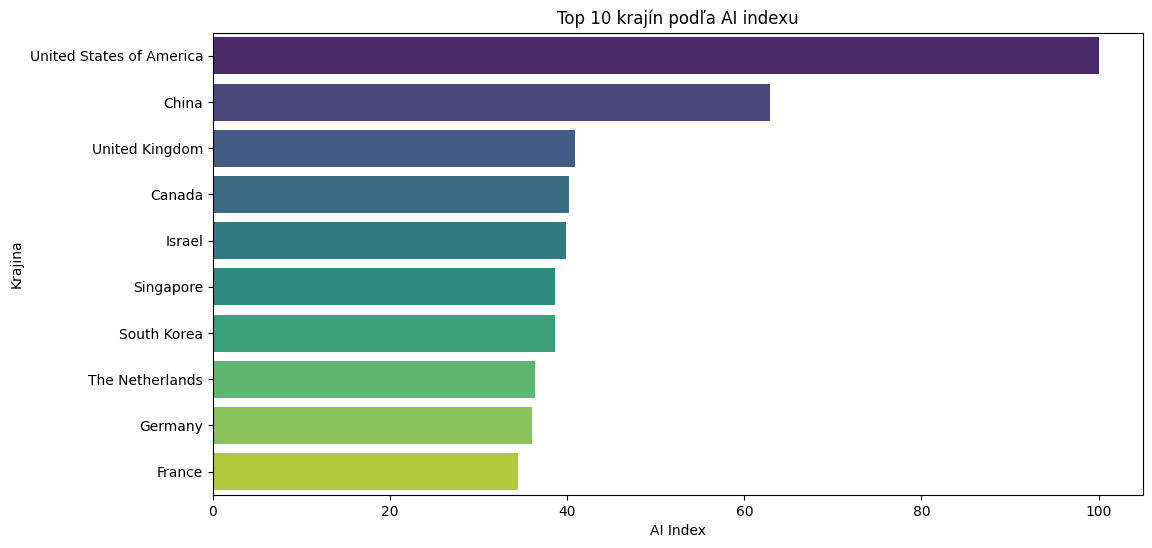

In [ ]:
# Top 10 krajín
top_countries = df_sorted.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x="AI Index", y="Country", data=top_countries, palette="viridis")
plt.title("Top 10 krajín podľa AI indexu")
plt.xlabel("AI Index")
plt.ylabel("Krajina")
plt.show()

**Distrubúcia hodnôt podľa krajín**

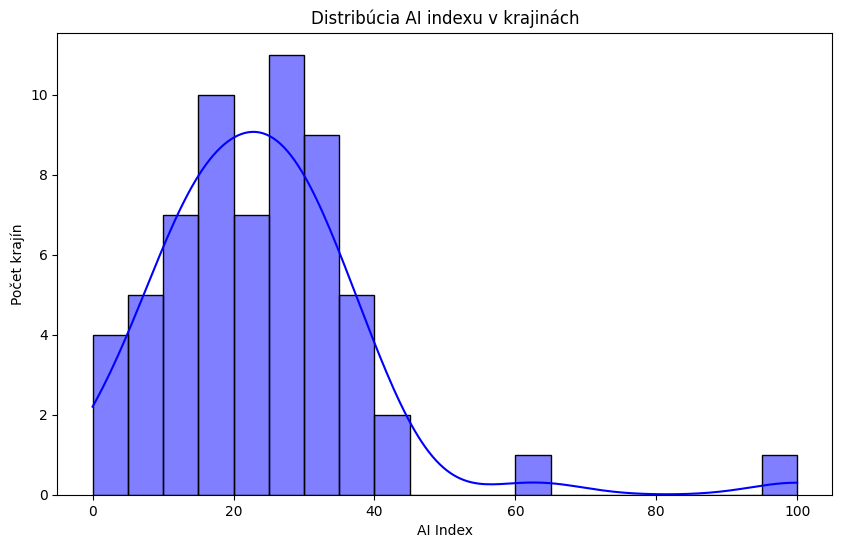

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="AI Index", bins=20, kde=True, color="blue")
plt.title("Distribúcia AI indexu v krajinách")
plt.xlabel("AI Index")
plt.ylabel("Počet krajín")
plt.show()

**Porovnanie vybraných krajín**

<ipython-input-22-a75aca6bec5a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="AI Index", y="Country", data=df_selected, palette="magma")


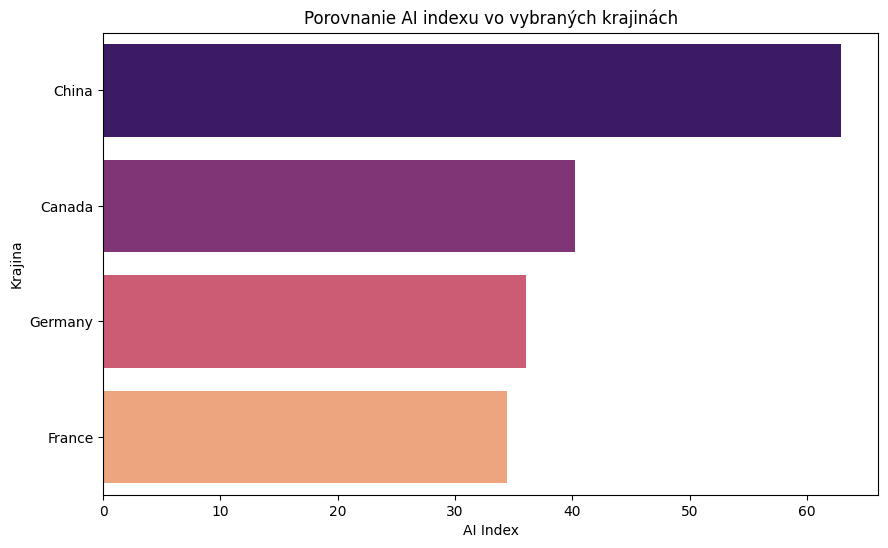

In [ ]:
# Výber niekoľkých krajín na porovnanie
selected_countries = ["United States", "China", "Canada", "Germany", "France"]
df_selected = df[df["Country"].isin(selected_countries)]

plt.figure(figsize=(10, 6))
sns.barplot(x="AI Index", y="Country", data=df_selected, palette="magma")
plt.title("Porovnanie AI indexu vo vybraných krajinách")
plt.xlabel("AI Index")
plt.ylabel("Krajina")
plt.show()

**AI Index podľa regiónov**

In [ ]:
# Priemerný AI index podľa regiónov
df.groupby("Region")["AI Index"].mean().sort_values(ascending=False)

,AI Index
Region,
Americas,29.031250
Asia-Pacific,25.792143
Europe,25.493103
Middle East,19.656667
Africa,6.426000


<ipython-input-25-2e95543f6330>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Region", y="AI Index", data=df, estimator="mean", ci=None, palette="coolwarm")
<ipython-input-25-2e95543f6330>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="AI Index", data=df, estimator="mean", ci=None, palette="coolwarm")


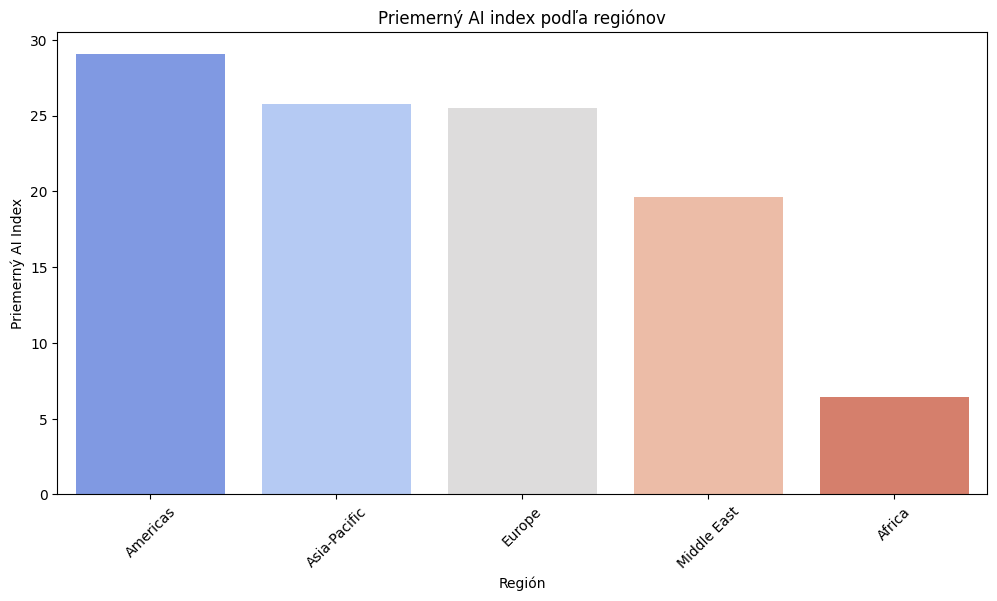

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Region", y="AI Index", data=df, estimator="mean", ci=None, palette="coolwarm")
plt.title("Priemerný AI index podľa regiónov")
plt.xticks(rotation=45)
plt.xlabel("Región")
plt.ylabel("Priemerný AI Index")
plt.show()

**Korelácia s inými faktormi (výskum, infraštruktúra, dostunosť talentu, inovácie)**

In [ ]:
# Korelácia medzi AI indexom a dostupnosťou talentu, výskum a vývoj, infraštruktúra
df[["AI Index", "Talent"]].corr()
df[["AI Index", "Research"]].corr()
df[["AI Index", "Development"]].corr()
df[["AI Index", "Infrastructure"]].corr()


,AI Index,Infrastructure
AI Index,1.000000,0.716481
Infrastructure,0.716481,1.000000


In [ ]:
# Korelácia medzi AI indexom a dostupnosťou talentu
df[["AI Index", "Research"]].corr()

,AI Index,Research
AI Index,1.000000,0.945877
Research,0.945877,1.000000


In [ ]:
# Korelácia medzi AI indexom a dostupnosťou talentu
df[["AI Index", "Development"]].corr()

,AI Index,Development
AI Index,1.000000,0.866337
Development,0.866337,1.000000


In [ ]:
# Korelácia medzi AI indexom a dostupnosťou talentu, výskum a vývoj, infraštruktúra
df[["AI Index", "Talent"]].corr()

,AI Index,Talent
AI Index,1.000000,0.861969
Talent,0.861969,1.000000


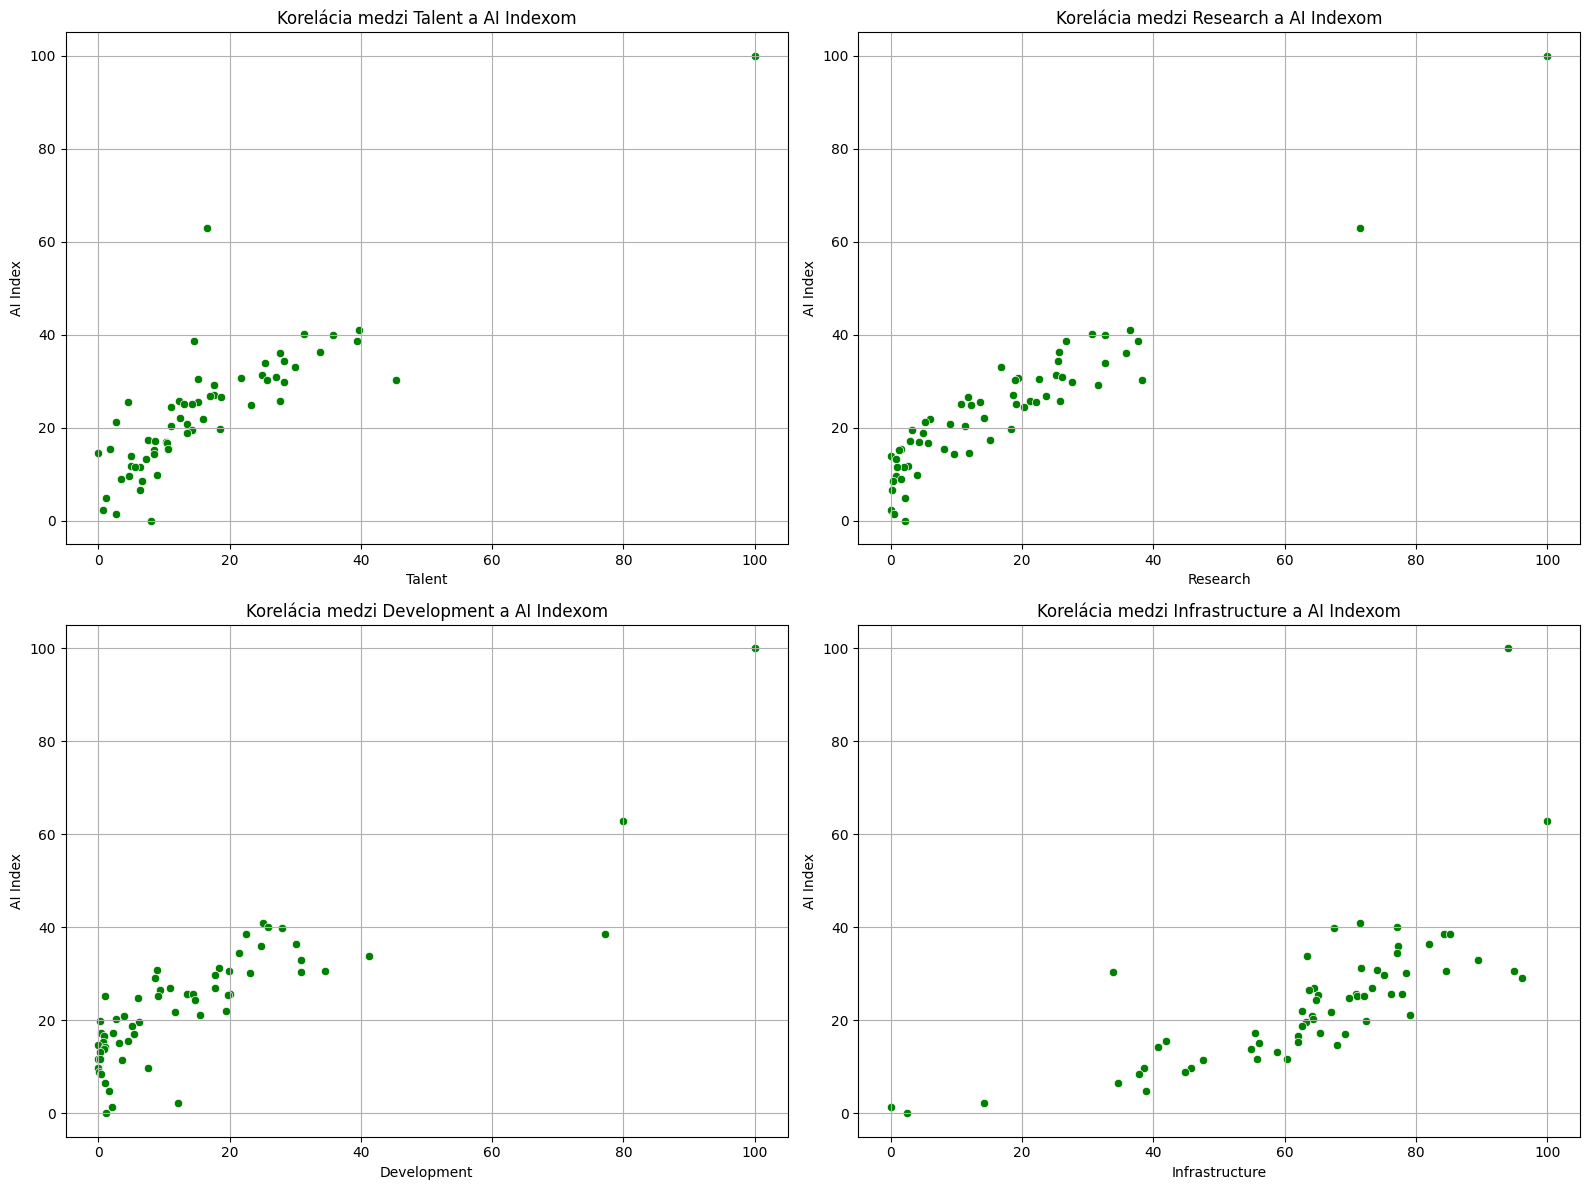

In [ ]:
features = ["Talent", "Research", "Development", "Infrastructure"]

plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=feature, y="AI Index", data=df, color="green")
    plt.title(f"Korelácia medzi {feature} a AI Indexom")
    plt.xlabel(feature)
    plt.ylabel("AI Index")
    plt.grid(True)
plt.tight_layout()
plt.show()

**Tepelná mapa korelácie**

In [ ]:
correlation_matrix = df[["AI Index", "Talent", "Research", "Development", "Infrastructure"]].corr()


Zobrazenie heat map

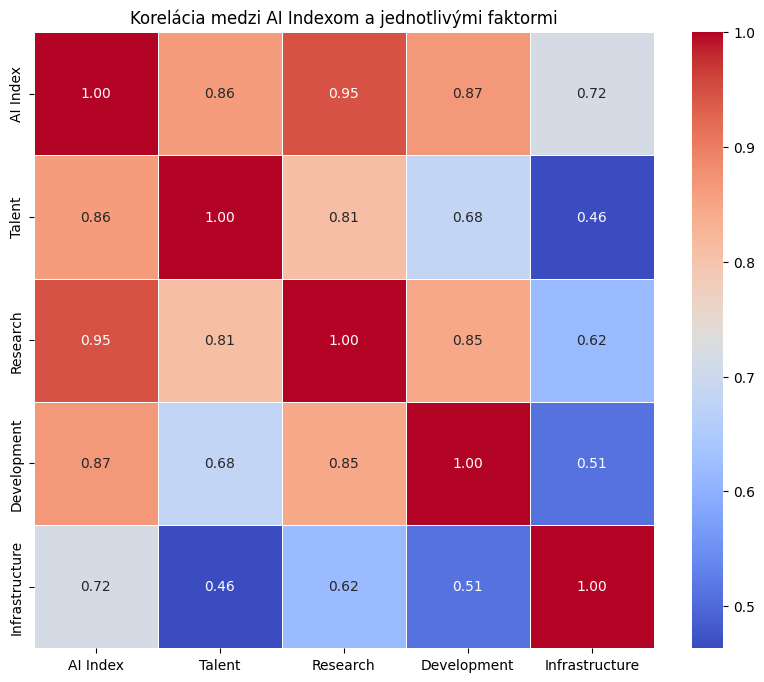

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelácia medzi AI Indexom a jednotlivými faktormi")
plt.show()


**Výsledky**



*   Podarilo sa mi identifikovať Top 10 krajiín, ktoré majú najvyššší AI index a analyzovala som tiež regionálne rozdiely
*  Získané poznatky ssom podporila vizualizáciami - dstribúcia AI indexu celková, v jednotlivých krajinách,  distribúcia hodnôt indexu v jednotlivých krajinách, TOP 10 krajín, AI index podľa regiónov, orelácia s inými faktormi (výskum, infraštruktúra, dostunosť talentu, inovácie, tepelná mapa korelácie)


*  Z analýzy vyplynuli faktory, ktoré najviac súvisia s výkonnosťou v AI ( výskum a vývoj, dostupnosť talentu, infraštruktúra a investície do technológií)
*   Položka zoznamu





**Použité nástroje a knižnice:**

Python:Hlavný programovací jazyk projektu.
Pandas: Na spracovanie a analýzu dát.
Seaborn, Matplotlib: Na tvorbu grafov a vizualizáciu výsledkov.





**Záver:**

Projekt ukazuje schopnosť efektívne spracovať, analyzovať a vizualizovať údaje o AI vo svete. Na základe analýzy som získala prehľad o rozdieloch medzi jednotlivými krajinami a regiónmi v oblasti AI a identifikovala som hlavné trendy a rozdiely.